<a href="https://colab.research.google.com/github/fakehaa/ANLP-Labs/blob/main/ANLP_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Sentiment Analysis using NLTK

In [1]:
import nltk

In [2]:
#download twitter from NLTK package
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


##Preprocessing

###Preprocessing-Tokenization

In [3]:
nltk.download('punkt') # downloading punkt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
positive_tweets = twitter_samples.strings('positive_tweets.json') # has 5000 tweets with positive sentiments
negative_tweets = twitter_samples.strings('negative_tweets.json') # has 5000 tweets with negative sentiments
text = twitter_samples.strings('tweets.20150430-223406.json') # has 20000 tweets with neutral/no sentiments

In [5]:
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


###Preprocessing-normalization (stemming & lemmatization)

In [6]:
# downloading both resources

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [7]:
from nltk.tag import pos_tag
from nltk.corpus import twitter_samples

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

print(pos_tag(tweet_tokens[0])) # POS-tags the tokens in the first tweet in the positive_tweets.json dataset


[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


In [8]:
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'): # we identify tokens tagged with "NN" as nouns
            pos = 'n'
        elif tag.startswith('VB'): # we identify tokens tagged with "VB" as verbs
            pos = 'v'
        else:
            pos = 'a'
        # we are getting the "lemma" of each token with the token and their POS as arguments and adding the resulting
        # lemma to the lemmatized_sentence array
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tweet_tokens[0])) # this prints the tokens as their root form


['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


###Preprocessing-reomoving noise and stop words

In [9]:
import re, string
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # removes all URLs or anything that starts with http:// or https://
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # removes all username mentions or anything that starts with @
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        # we are adding the lemmatize_sentence function from earlier here
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        # this line adds all tokens with more than zero length that are not punctuation marks and
        # are not stop words in the cleaned_tokens array
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())

    return cleaned_tokens


In [10]:
#stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # specifying to use only stop words in the English language

print(remove_noise(tweet_tokens[0], stop_words)) # we are using the remove_noise function defined in the previous cell


['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [12]:
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))


In [13]:
print("This are the tokens before preprocessing: ",positive_tweet_tokens[500],"\n")
print("This are the tokens after preprocessing: ",positive_cleaned_tokens_list[500])


This are the tokens before preprocessing:  ['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht'] 

This are the tokens after preprocessing:  ['dang', 'rad', '#fanart', ':d']


##Determine word density

###Feature Vectorization

In [14]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)

In [15]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10)) # lists the top 10 most common tokens


[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


###Preparing the data for the model

In [16]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)


###Splitting dataset to train and test

In [17]:
import random
# attaches the positive or negative label
positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

# putting the positive and negative dataset into one combined dataset
dataset = positive_dataset + negative_dataset

# shuffling the dataset so sentiments are scattered throughout the dataset
random.shuffle(dataset)
# assigning the train and test data; train is from 0 to 6999 and test is 7000 to 9999
train_data = dataset[:7000]
test_data = dataset[7000:]


###Build and testing

In [18]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))


Accuracy is: 0.995
Most Informative Features
                      :( = True           Negati : Positi =   2061.6 : 1.0
                      :) = True           Positi : Negati =    981.6 : 1.0
                     sad = True           Negati : Positi =     25.9 : 1.0
                followed = True           Negati : Positi =     24.6 : 1.0
                follower = True           Positi : Negati =     21.5 : 1.0
                     bam = True           Positi : Negati =     21.4 : 1.0
                     x15 = True           Negati : Positi =     14.5 : 1.0
                   didnt = True           Negati : Positi =     13.8 : 1.0
                  arrive = True           Positi : Negati =     13.7 : 1.0
                    glad = True           Positi : Negati =     13.2 : 1.0
None


In [29]:
from nltk.tokenize import word_tokenize

#custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."
#custom_tweet = 'Congrats #SportStar on your 7th best goal from last season winning goal of the year :) #Baller #Topbin #oneofmanyworldies'
#custom_tweet = 'Thank you for sending my baggage to CityX and flying me to CityY at the same time. Brilliant service that is set up for failure. #thanksGenericAirline'

custom_tweet = 'This is so incredibly unfunny, i dont think ill ever have the urge to smile again'

custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))


Positive


##CNN Based

In [30]:
!pip install keras --q

In [31]:
# Import the tools we will need from keras and sklearn
#import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string
import pandas as pd
import numpy as np
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

###Data exploration

In [32]:
# reading the file using pandas and pass arguments to tell the function that the delimiter is tab
# and there is no header in our data file

data = pd.read_csv('/content/imdb_labelled.tsv', header = None, delimiter='\t')


In [33]:
# setting the header

data.columns = ['Text', 'Label']


In [34]:
#check the header (output should show the specified column names in the previous cell)

data.head()


,Text,Label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [35]:
data.Label.unique() # returns an array or list of unique values present in the 'Label' column of the 'data' dataset

array([0, 1])

In [36]:
data.shape #check the shape of the data

(748, 2)

In [37]:
data.Label.value_counts()#Now we see the class distribution. We have 386 positive and 362 negative examples.

Label
1    386
0    362
Name: count, dtype: int64

In [38]:
# adding positive (1) and negative (0) labels to each instance

pos = []
neg = []
for l in data.Label:
    if l == 0:
        pos.append(0)
        neg.append(1)
    elif l == 1:
        pos.append(1)
        neg.append(0)


In [39]:
data['Pos']= pos
data['Neg']= neg


In [40]:
data.head()

,Text,Label,Pos,Neg
0,"A very, very, very slow-moving, aimless movie ...",0,0,1
1,Not sure who was more lost - the flat characte...,0,0,1
2,Attempting artiness with black & white and cle...,0,0,1
3,Very little music or anything to speak of.,0,0,1
4,The best scene in the movie was when Gerardo i...,1,1,0


###Data Cleaning

In [41]:
# removing non-alphabet characters or punctuations

def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

data['Text_Clean'] = data['Text'].apply(lambda x: remove_punct(x))


In [42]:
# Tokenization

from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in data.Text_Clean]


In [43]:
# turn tokens into lower-case

def lower_token(tokens):
    return [w.lower() for w in tokens]

lower_tokens = [lower_token(token) for token in tokens]


In [44]:
# getting stopwords in English

from nltk.corpus import stopwords
stoplist = stopwords.words('english')


In [45]:
# removing stop words

def remove_stop_words(tokens):
    return [word for word in tokens if word not in stoplist]


In [46]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]
result = [' '.join(sen) for sen in filtered_words]
data['Text_Final'] = result
# adding the tokens to the dataset

data['tokens'] = filtered_words
data = data[['Text_Final', 'tokens', 'Label', 'Pos', 'Neg']]
data[:4]


,Text_Final,tokens,Label,Pos,Neg
0,slowmoving aimless movie distressed drifting y...,"[slowmoving, aimless, movie, distressed, drift...",0,0,1
1,sure lost flat characters audience nearly half...,"[sure, lost, flat, characters, audience, nearl...",0,0,1
2,attempting artiness black white clever camera ...,"[attempting, artiness, black, white, clever, c...",0,0,1
3,little music anything speak,"[little, music, anything, speak]",0,0,1


###Split data into test and train

In [48]:
data_train, data_test = train_test_split(data, test_size=0.10, random_state=42)

In [49]:
# Then we build training vocabulary and get maximum training sentence length and total number of words training data.

all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))


7218 words total, with a vocabulary size of 2881
Max sentence length is 789


In [50]:
# Same thing is done for testing data.

all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))


580 words total, with a vocabulary size of 457
Max sentence length is 24


###Loading Google News Word2Vec model

In [51]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Embedding
from keras.layers import LSTM
from keras.models import Sequential
#from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Model


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
word2vec_path = "/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz" #downloaded W2V model
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)


In [55]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged


In [56]:
def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, generate_missing=generate_missing))
    return list(embeddings)


###Getting embeddings

In [57]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

###Tokenize and pad sequences

In [58]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [59]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))


Found 2881 unique tokens.


In [60]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [61]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)


(2882, 300)


In [62]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)


###Define CNN

In [63]:
label_names = ['Pos', 'Neg'] # labels
y_train = data_train[label_names].values
y_test = data_test[label_names].values
print(y_train)


[[1 0]
 [0 1]
 [0 1]
 ...
 [1 0]
 [0 1]
 [0 1]]


In [64]:
labels_index = len(list(label_names))
print(labels_index)


2


In [65]:
num_words = len(train_word_index)+1
max_sequence_length = 50
embedding_dim = 300


In [66]:
embeddings =train_embedding_weights
embedding_layer = Embedding(num_words,
                            embedding_dim,
                            trainable=False)


In [67]:
embedding_layer.build((1,))
embedding_layer.set_weights([embeddings])


###Construct the model

In [68]:
sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
conv_1 = Conv1D(filters=200, kernel_size=2, activation='relu')(embedded_sequences)
pool_1 = MaxPooling1D()(conv_1)
conv_2 = Conv1D(filters=200, kernel_size=3, activation='relu')(pool_1)
pool_2 = MaxPooling1D()(conv_2)
flattening = Flatten()(pool_2)
dp_1 =  Dropout(0.1)(flattening)
dense_1 = Dense(128, activation='relu')(dp_1)
dp_2= Dropout(0.1)(dense_1)
out = Dense(labels_index, activation='sigmoid')(dp_2)


In [69]:
model = Model(inputs = sequence_input, outputs = out)

In [70]:
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['acc'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 300)           864600    
                                                                 
 conv1d (Conv1D)             (None, 49, 200)           120200    
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 200)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 200)           120200    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 11, 200)           0         
 g1D)                                                        

In [71]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# use this to apply a stopping criterion of 5 for the training epochs based on validation loss
#the training will stop if after 5 epochs there is no improvement in validation loss and will save best model in model_file


In [72]:
model_file = 'best_CNN_model.keras'

In [73]:
model_check_point = ModelCheckpoint(model_file, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [74]:
hist = model.fit(train_cnn_data, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1, callbacks=[early_stopping_monitor, model_check_point])

Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 0.6797 - acc: 0.5917
Epoch 1: val_loss improved from inf to 0.66023, saving model to best_CNN_model.keras
19/19 [==============================] - 4s 83ms/step - loss: 0.6797 - acc: 0.5917 - val_loss: 0.6602 - val_acc: 0.6324
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 0.5746 - acc: 0.7405
Epoch 2: val_loss improved from 0.66023 to 0.54825, saving model to best_CNN_model.keras
19/19 [==============================] - 2s 81ms/step - loss: 0.5746 - acc: 0.7405 - val_loss: 0.5482 - val_acc: 0.7647
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 0.3504 - acc: 0.8579
Epoch 3: val_loss did not improve from 0.54825
19/19 [==============================] - 1s 77ms/step - loss: 0.3504 - acc: 0.8579 - val_loss: 0.5862 - val_acc: 0.7206
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 0.2167 - acc: 0.9058
Epoch 4: val_loss improved from 0.54825 to 0.48921, saving mode

In [75]:
from keras.models import load_model
model = load_model('best_CNN_model.keras')

In [76]:
# Test the model on the test data after training
test_results = model.evaluate(test_cnn_data, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')


3/3 [==============================] - 1s 33ms/step - loss: 0.5373 - acc: 0.7333
Test results - Accuracy:  73.33%


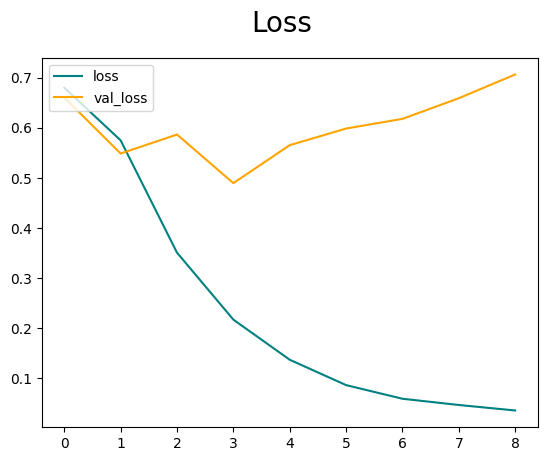

In [77]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()